In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
laptops_df = pd.read_csv('laptop_prices.csv')
df.head()

Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageType  SecondaryStorageType  \
0            128                 0                SSD                    No   
1            128                 0      Flash Storage                    No   
2            256                 0                SSD                    No   
3            512                 0                SSD                    No   
4            256                 0                SSD                    No   

   GPU_company               GPU_model  
0        Intel  Iris Plus Graphics 640  
1        Intel        HD Graphics 6000  
2        Intel         HD Graphics 620  
3          AMD          Radeon Pro 455  
4        Intel  Iris Plus Graphics 650  

[5 rows x 23 columns]

In [8]:
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [24]:
#replacing the missing values .
numerical_columns = laptops_df.select_dtypes(include=['float64', 'int64']).columns

laptops_df[numerical_columns] = laptops_df[numerical_columns].fillna(laptops_df[numerical_columns].mean())

missing_values_after = laptops_df[numerical_columns].isnull().sum()
print("Missing values after replacement:")
print(missing_values_after)

Missing values after replacement:
Inches              0
Ram                 0
Weight              0
Price_euros         0
ScreenW             0
ScreenH             0
CPU_freq            0
PrimaryStorage      0
SecondaryStorage    0
dtype: int64


In [4]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [9]:

missing_values = laptops_df.isnull().sum()
summary_stats = laptops_df.describe()

missing_values, summary_stats

(Company                 0
 Product                 0
 TypeName                0
 Inches                  0
 Ram                     0
 OS                      0
 Weight                  0
 Price_euros             0
 Screen                  0
 ScreenW                 0
 ScreenH                 0
 Touchscreen             0
 IPSpanel                0
 RetinaDisplay           0
 CPU_company             0
 CPU_freq                0
 CPU_model               0
 PrimaryStorage          0
 SecondaryStorage        0
 PrimaryStorageType      0
 SecondaryStorageType    0
 GPU_company             0
 GPU_model               0
 dtype: int64,
             Inches          Ram       Weight  Price_euros      ScreenW  \
 count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
 mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
 std       1.429470     5.097809     0.669196   700.752504   493.346186   
 min      10.100000     2.000000     0.690000   174.000000  1366

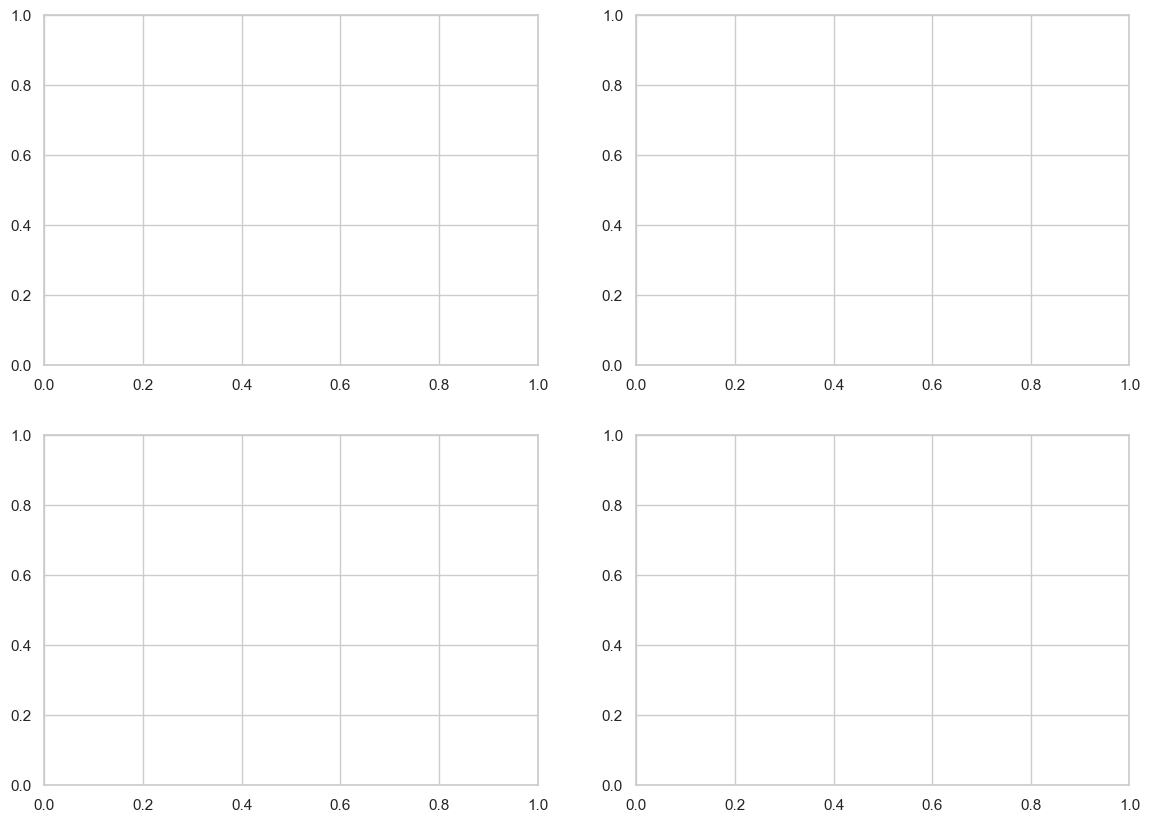

In [10]:
# Setting up the plotting style
sns.set(style="whitegrid")

# Plotting histograms for key numeric variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

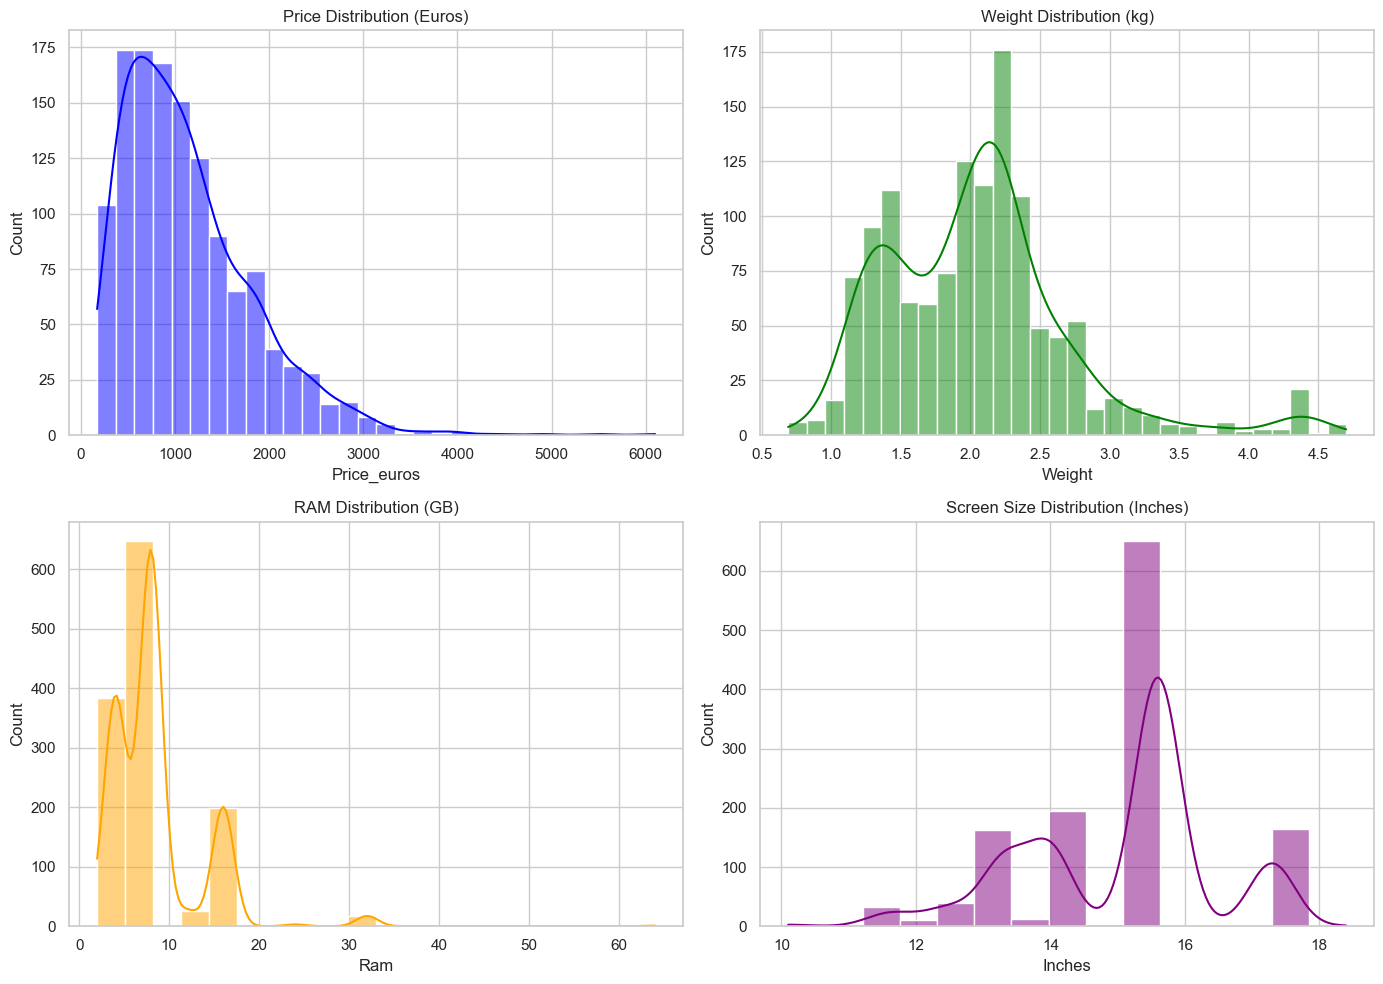

In [14]:
# Setting up the plotting style
sns.set(style="whitegrid")

# Plotting histograms for key numeric variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Price distribution
sns.histplot(laptops_df['Price_euros'], bins=30, kde=True, ax=axs[0, 0], color="blue")
axs[0, 0].set_title('Price Distribution (Euros)')

# Weight distribution
sns.histplot(laptops_df['Weight'], bins=30, kde=True, ax=axs[0, 1], color="green")
axs[0, 1].set_title('Weight Distribution (kg)')

# RAM distribution
sns.histplot(laptops_df['Ram'], bins=20, kde=True, ax=axs[1, 0], color="orange")
axs[1, 0].set_title('RAM Distribution (GB)')

# Screen size distribution
sns.histplot(laptops_df['Inches'], bins=15, kde=True, ax=axs[1, 1], color="purple")
axs[1, 1].set_title('Screen Size Distribution (Inches)')

plt.tight_layout()
plt.show()

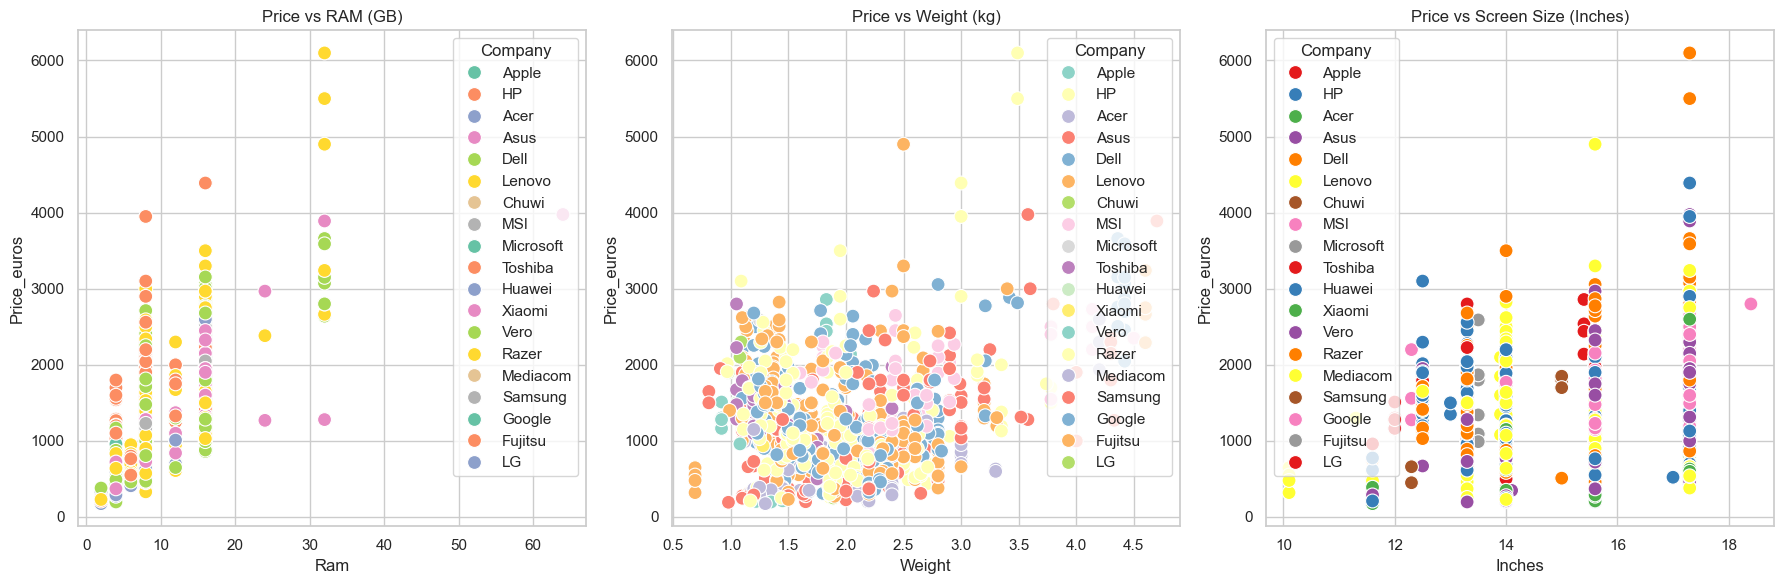

In [15]:
# Scatter plots to examine relationships between price and other key factors (RAM, Weight, Screen Size)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Price vs RAM
sns.scatterplot(x='Ram', y='Price_euros', data=laptops_df, ax=axs[0], hue="Company", palette="Set2", s=100)
axs[0].set_title('Price vs RAM (GB)')

# Price vs Weight
sns.scatterplot(x='Weight', y='Price_euros', data=laptops_df, ax=axs[1], hue="Company", palette="Set3", s=100)
axs[1].set_title('Price vs Weight (kg)')

# Price vs Screen Size
sns.scatterplot(x='Inches', y='Price_euros', data=laptops_df, ax=axs[2], hue="Company", palette="Set1", s=100)
axs[2].set_title('Price vs Screen Size (Inches)')

plt.tight_layout()
plt.show()

C:\Users\jakha\AppData\Local\Temp\ipykernel_14880\2158965072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=laptops_df, x='Company', palette='Set2')


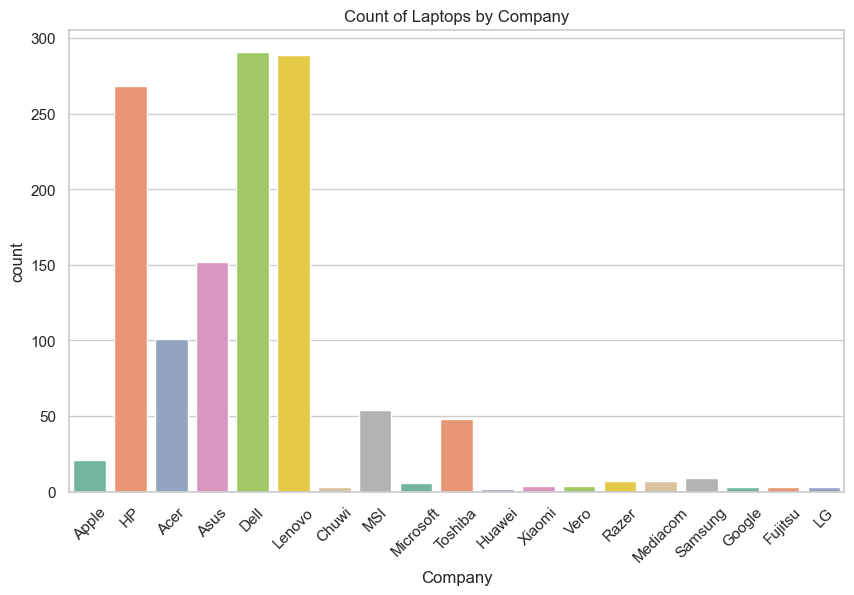

In [16]:
# Setting up the plotting style
sns.set(style="whitegrid")

# Bar graph for Company counts
plt.figure(figsize=(10, 6))
sns.countplot(data=laptops_df, x='Company', palette='Set2')
plt.xticks(rotation=45)
plt.title('Count of Laptops by Company')
plt.show()

C:\Users\jakha\AppData\Local\Temp\ipykernel_14880\3316016587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=laptops_df, x='TypeName', palette='Set3')


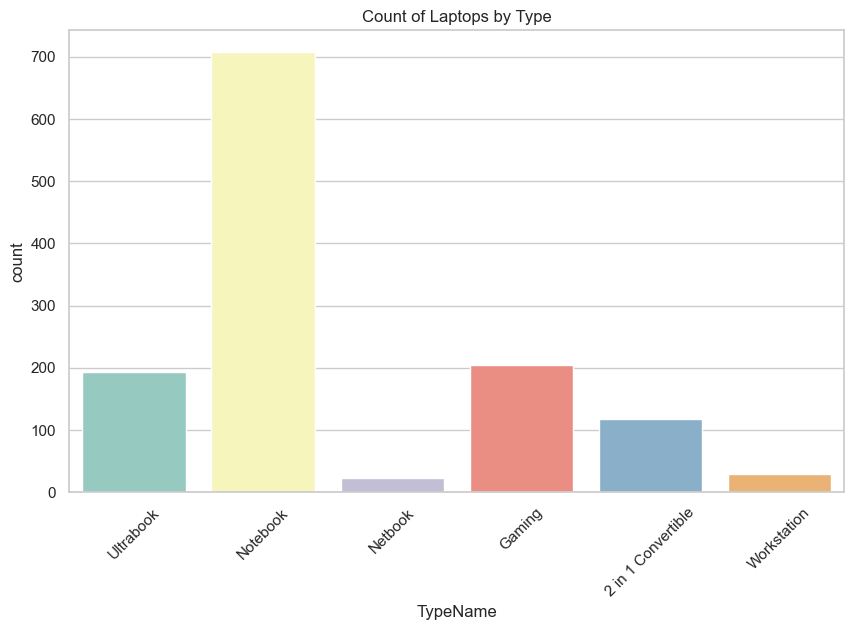

In [17]:
# Bar graph for TypeName counts
plt.figure(figsize=(10, 6))
sns.countplot(data=laptops_df, x='TypeName', palette='Set3')
plt.xticks(rotation=45)
plt.title('Count of Laptops by Type')
plt.show()

C:\Users\jakha\AppData\Local\Temp\ipykernel_14880\2716184632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Price_euros', data=laptops_df, palette='Set1')


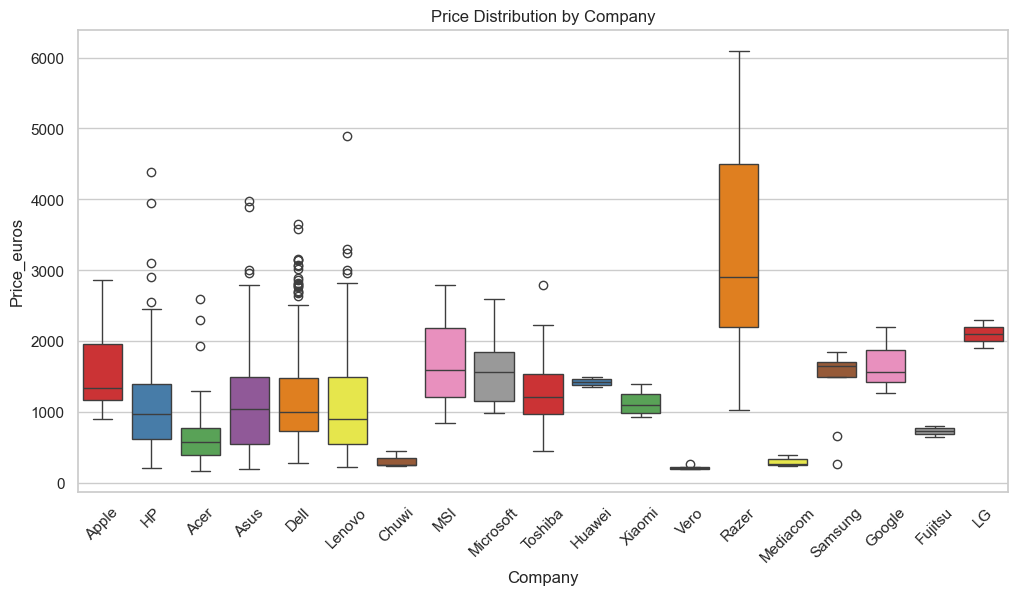

C:\Users\jakha\AppData\Local\Temp\ipykernel_14880\2716184632.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TypeName', y='Ram', data=laptops_df, palette='Set3')


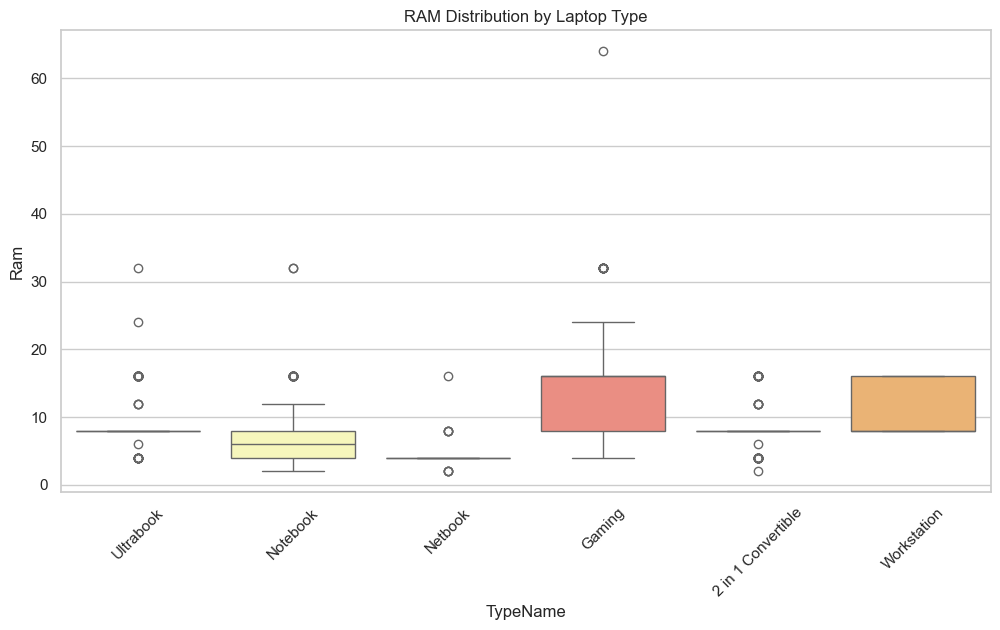

In [18]:
# Boxplot for Price by Company
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=laptops_df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.show()

# Boxplot for RAM by TypeName
plt.figure(figsize=(12, 6))
sns.boxplot(x='TypeName', y='Ram', data=laptops_df, palette='Set3')
plt.xticks(rotation=45)
plt.title('RAM Distribution by Laptop Type')
plt.show()

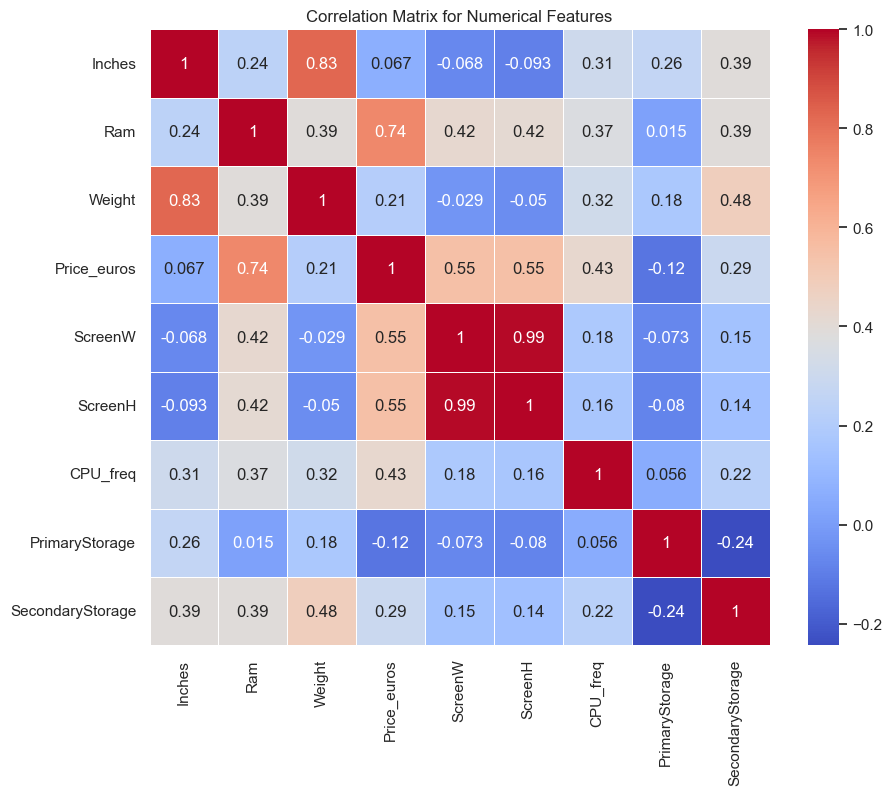

Pearson Correlation with Price:
Price_euros         1.000000
Ram                 0.740287
ScreenW             0.552491
ScreenH             0.548529
CPU_freq            0.428847
SecondaryStorage    0.291207
Weight              0.211883
Inches              0.066608
PrimaryStorage     -0.124775
Name: Price_euros, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for numerical columns
correlation_matrix = laptops_df.corr(numeric_only=True)

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Pearson correlation between price and other numerical features
pearson_corr_price = correlation_matrix['Price_euros'].sort_values(ascending=False)
print("Pearson Correlation with Price:")
print(pearson_corr_price)


In [22]:
# Crosstab between Company and TypeName (how different companies contribute to different types)
company_type_crosstab = pd.crosstab(laptops_df['Company'], laptops_df['TypeName'])
print(company_type_crosstab)

# Crosstab between OS and Touchscreen (to analyze how operating systems correlate with touchscreen availability)
os_touchscreen_crosstab = pd.crosstab(laptops_df['OS'], laptops_df['Touchscreen'])
print(os_touchscreen_crosstab)

TypeName   2 in 1 Convertible  Gaming  Netbook  Notebook  Ultrabook  \
Company                                                               
Acer                        8       8        5        76          4   
Apple                       0       0        0         0         21   
Asus                       13      54        4        63         18   
Chuwi                       0       0        0         3          0   
Dell                       30      40        2       159         49   
Fujitsu                     0       0        0         3          0   
Google                      0       0        0         0          3   
HP                         19      12        7       180         36   
Huawei                      0       0        0         0          2   
LG                          0       0        0         0          3   
Lenovo                     44      32        4       174         31   
MSI                         0      54        0         0          0   
Mediac

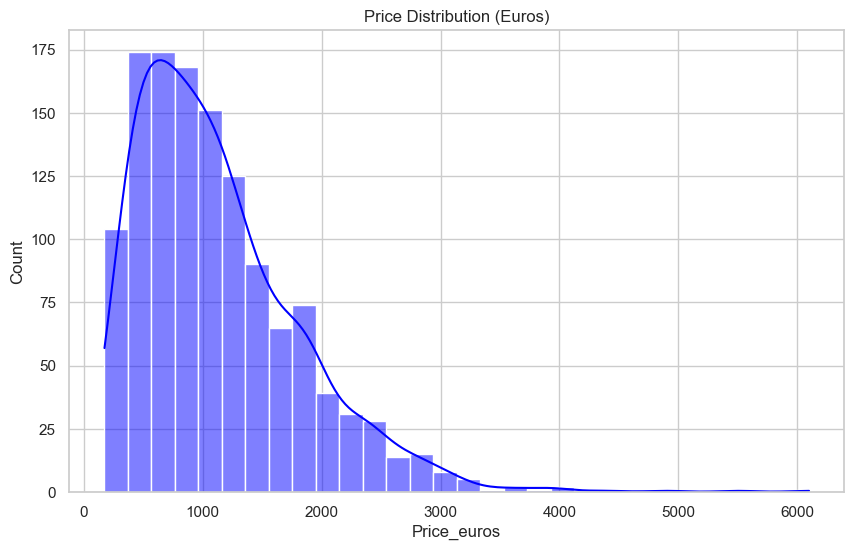

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(laptops_df['Price_euros'], bins=30, kde=True, color="blue")
plt.title('Price Distribution (Euros)')
plt.show()

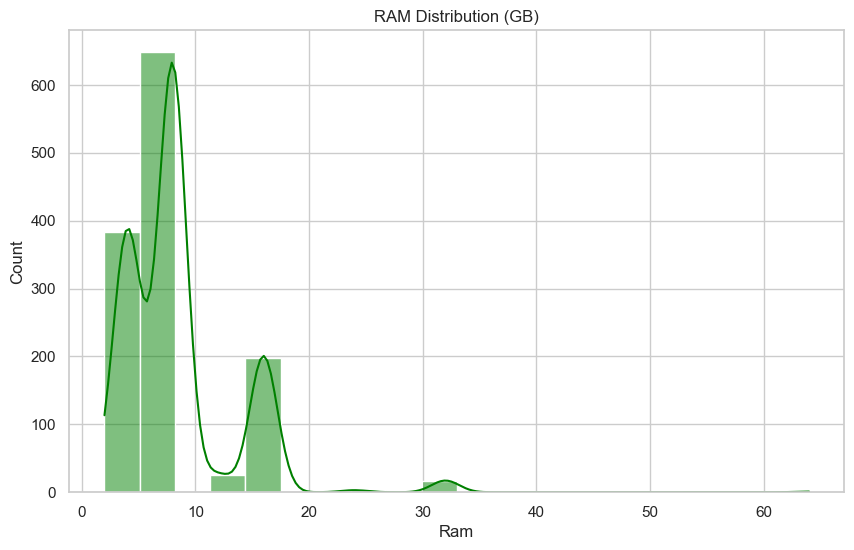

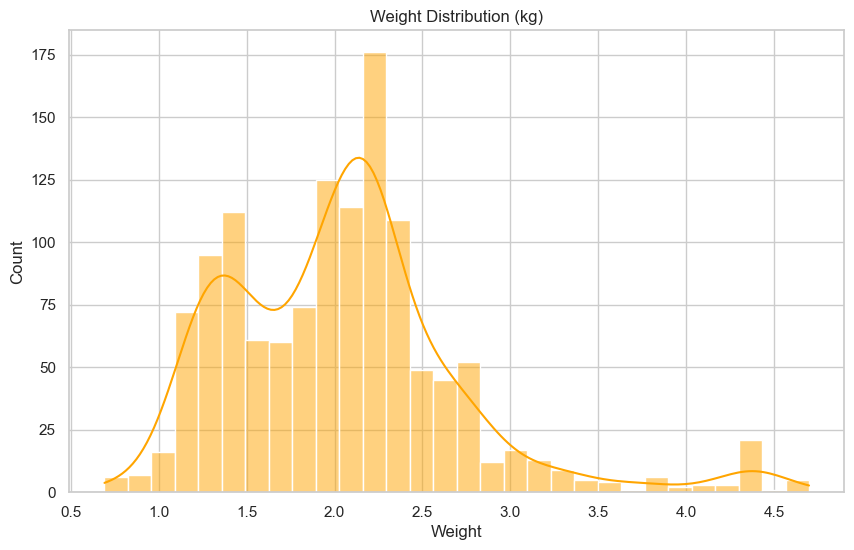

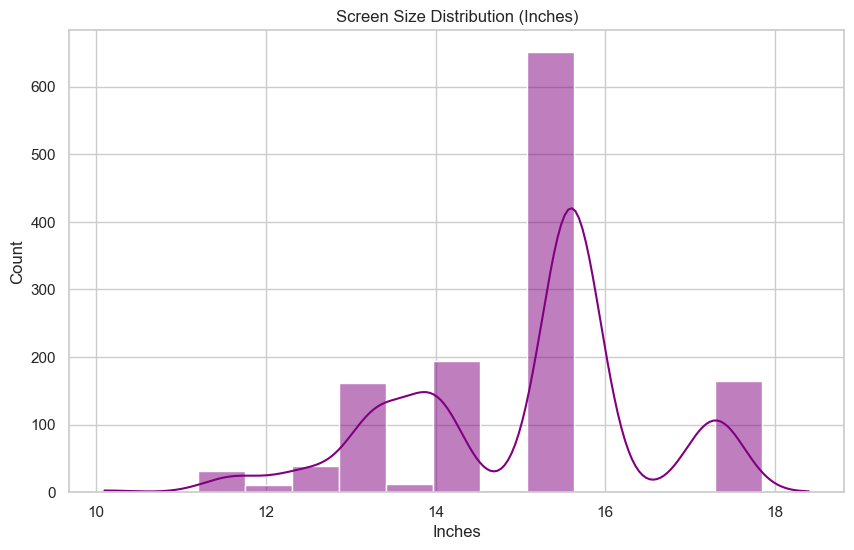

In [28]:
# Histogram: RAM distribution
plt.figure(figsize=(10, 6))
sns.histplot(laptops_df['Ram'], bins=20, kde=True, color="green")
plt.title('RAM Distribution (GB)')
plt.show()

# Histogram: Weight distribution
plt.figure(figsize=(10, 6))
sns.histplot(laptops_df['Weight'], bins=30, kde=True, color="orange")
plt.title('Weight Distribution (kg)')
plt.show()

# Histogram: Screen size distribution
plt.figure(figsize=(10, 6))
sns.histplot(laptops_df['Inches'], bins=15, kde=True, color="purple")
plt.title('Screen Size Distribution (Inches)')
plt.show()